In [1]:
#Duetsch Algorithm written by Dinesh D

#importing Qiskit(terra,IBM Q,AER),matplotlib and numpy
from qiskit import * 
from qiskit import IBMQ
%matplotlib inline
import numpy as np
from qiskit.visualization import plot_histogram

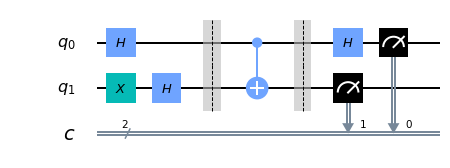

In [2]:
#Circuit with 2 qubits and one classical channel
Uf=QuantumCircuit(2,2)
barriers=True
#applying haddamard gate to the first qubit
Uf.x(1)
Uf.h(0)
Uf.h(1)
Uf.barrier()
Uf.cx(0,1)
Uf.barrier()
Uf.h(0)
Uf.measure(0,0)
Uf.measure(1,1)
backend= Aer.get_backend('qasm_simulator')
result=execute(Uf,backend=backend,shots=1024).result()
answer=result.get_counts()
Uf.draw(output='mpl')

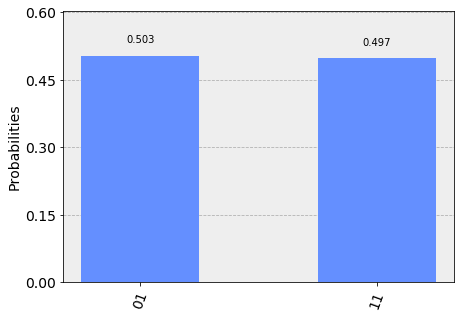

In [3]:
plot_histogram(answer)

In [4]:
IBMQ.load_account()
provider= IBMQ.get_provider('ibm-q')

In [5]:
qcomp =provider.get_backend('ibmq_burlington')

In [6]:
from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(Uf, backend=qcomp, shots=shots)
job_monitor(job, interval = 2)

Job Status: job has successfully run


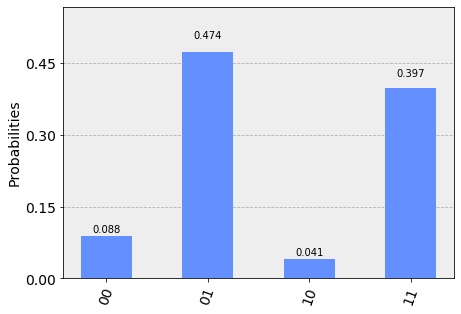

In [7]:
results = job.result()
answer1 = results.get_counts()

plot_histogram(answer1)